In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/풍력발전량예측

/content/drive/MyDrive/Colab Notebooks/풍력발전량예측


## 풍력발전량예측

In [ ]:
! pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split

# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

## Data

In [51]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
train.isnull().sum()

id                0
temperature       0
pressure          0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
snowing           0
cloudiness        0
target            0
dtype: int64

In [ ]:
test.isnull().sum()

id                0
temperature       0
pressure          0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
snowing           0
cloudiness        0
dtype: int64

## EDA

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,19275.0,17.288476,7.192604,-0.208137,11.712,16.530,22.5590,37.058
pressure,19275.0,1059.825712,2544.132430,812.600000,1012.600,1016.800,1021.0000,201373.000
humidity,19275.0,68.948763,14.856929,22.600000,57.800,70.800,80.8000,100.000
wind_speed,19275.0,2.476970,1.359942,0.000000,1.400,2.200,3.2000,29.800
wind_direction,19275.0,166.578179,57.313099,0.000000,127.000,166.600,208.0000,338.000
precipitation,19275.0,0.076572,0.193110,0.000000,0.000,0.000,0.0600,3.180
cloudiness,19275.0,25.749748,17.628612,0.000000,12.000,23.000,37.0000,93.600
target,19275.0,5.477028,3.217581,0.000000,2.956,4.837,7.4365,17.344


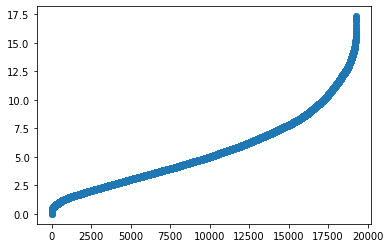

In [ ]:
plt.scatter(range(train.shape[0]), np.sort(train['target'].values))

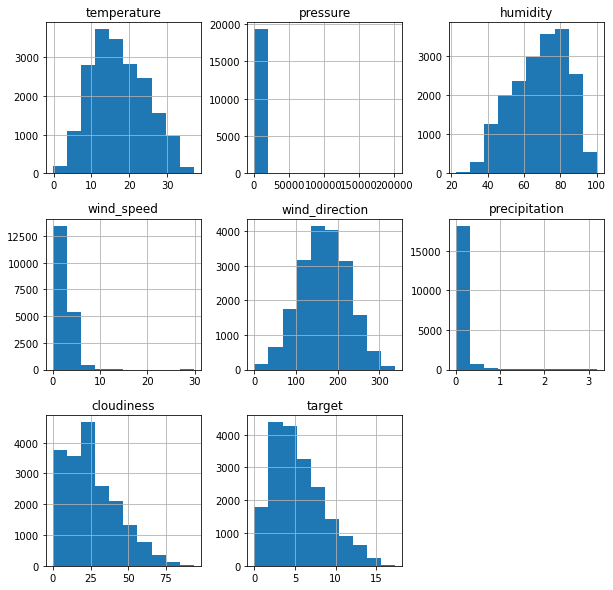

,feature,skewness,kurtosis
0,temperature,0.26,-0.65
1,pressure,76.07,5962.79
2,humidity,-0.33,-0.75
3,wind_speed,1.68,10.55
4,wind_direction,-0.04,-0.37
5,precipitation,6.73,68.66
6,cloudiness,0.70,0.10
7,target,0.77,-0.00


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train.hist(figsize=(10, 10))
plt.show()
l = []
for col in train.select_dtypes(include=numerics):
    skewness = round(train[col].skew(),2)
    kurtosis = round(train[col].kurt(),2)
    a = [col, skewness, kurtosis]
    l.append(a)
pd.DataFrame(l, columns = ['feature', 'skewness', 'kurtosis'])

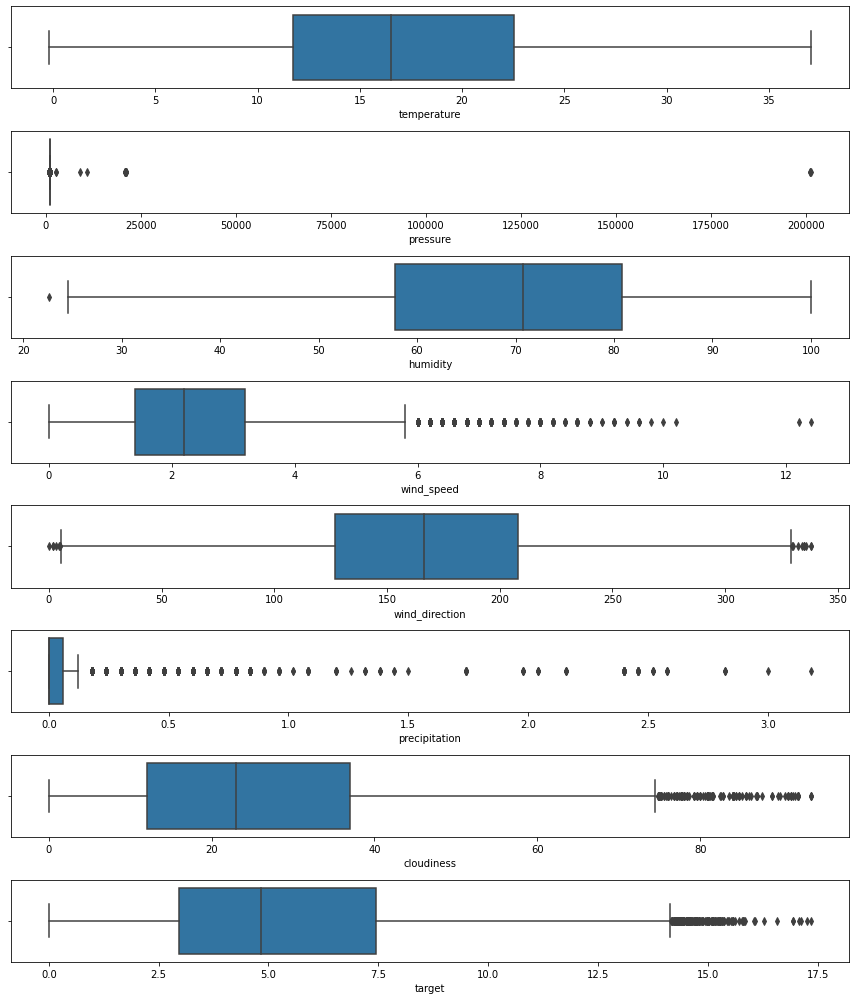

In [54]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = train.select_dtypes(include=numerics)
fig, axes = plt.subplots(nrows = len(num_cols.columns), figsize = (12, 14))
for col, ax in zip(num_cols, axes.flat):
  sns.boxplot(data = train, x = col, ax = ax)
fig.tight_layout()


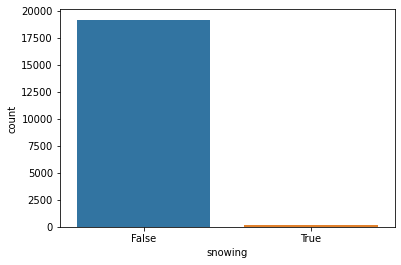

In [ ]:
sns.countplot(data = train, x = 'snowing')

In [ ]:
display(train.groupby('snowing').mean())

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
snowing,,,,,,,,
False,17.359732,1060.196261,68.936031,2.470339,166.310131,0.075048,25.653943,5.478660
True,6.372144,1003.057600,70.899200,3.492800,207.643200,0.310080,40.427200,5.226992


In [ ]:
display(train.groupby('snowing').median())

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
snowing,,,,,,,,
False,16.606000,1016.8,70.8,2.2,166.0,0.00,23.0,4.839
True,6.361269,1001.2,70.2,3.4,211.6,0.18,36.8,4.628


In [ ]:
# snowing 그룹간 타겟 값 차이가 유의미한지 검증
import scipy.stats

snowing_false = train[train['snowing']==False]['target'].values
snowing_true = train[train['snowing']==True]['target'].values

scipy.stats.ttest_ind(snowing_false, snowing_true, equal_var=False)

Ttest_indResult(statistic=0.9873546844734775, pvalue=0.3253596358094196)

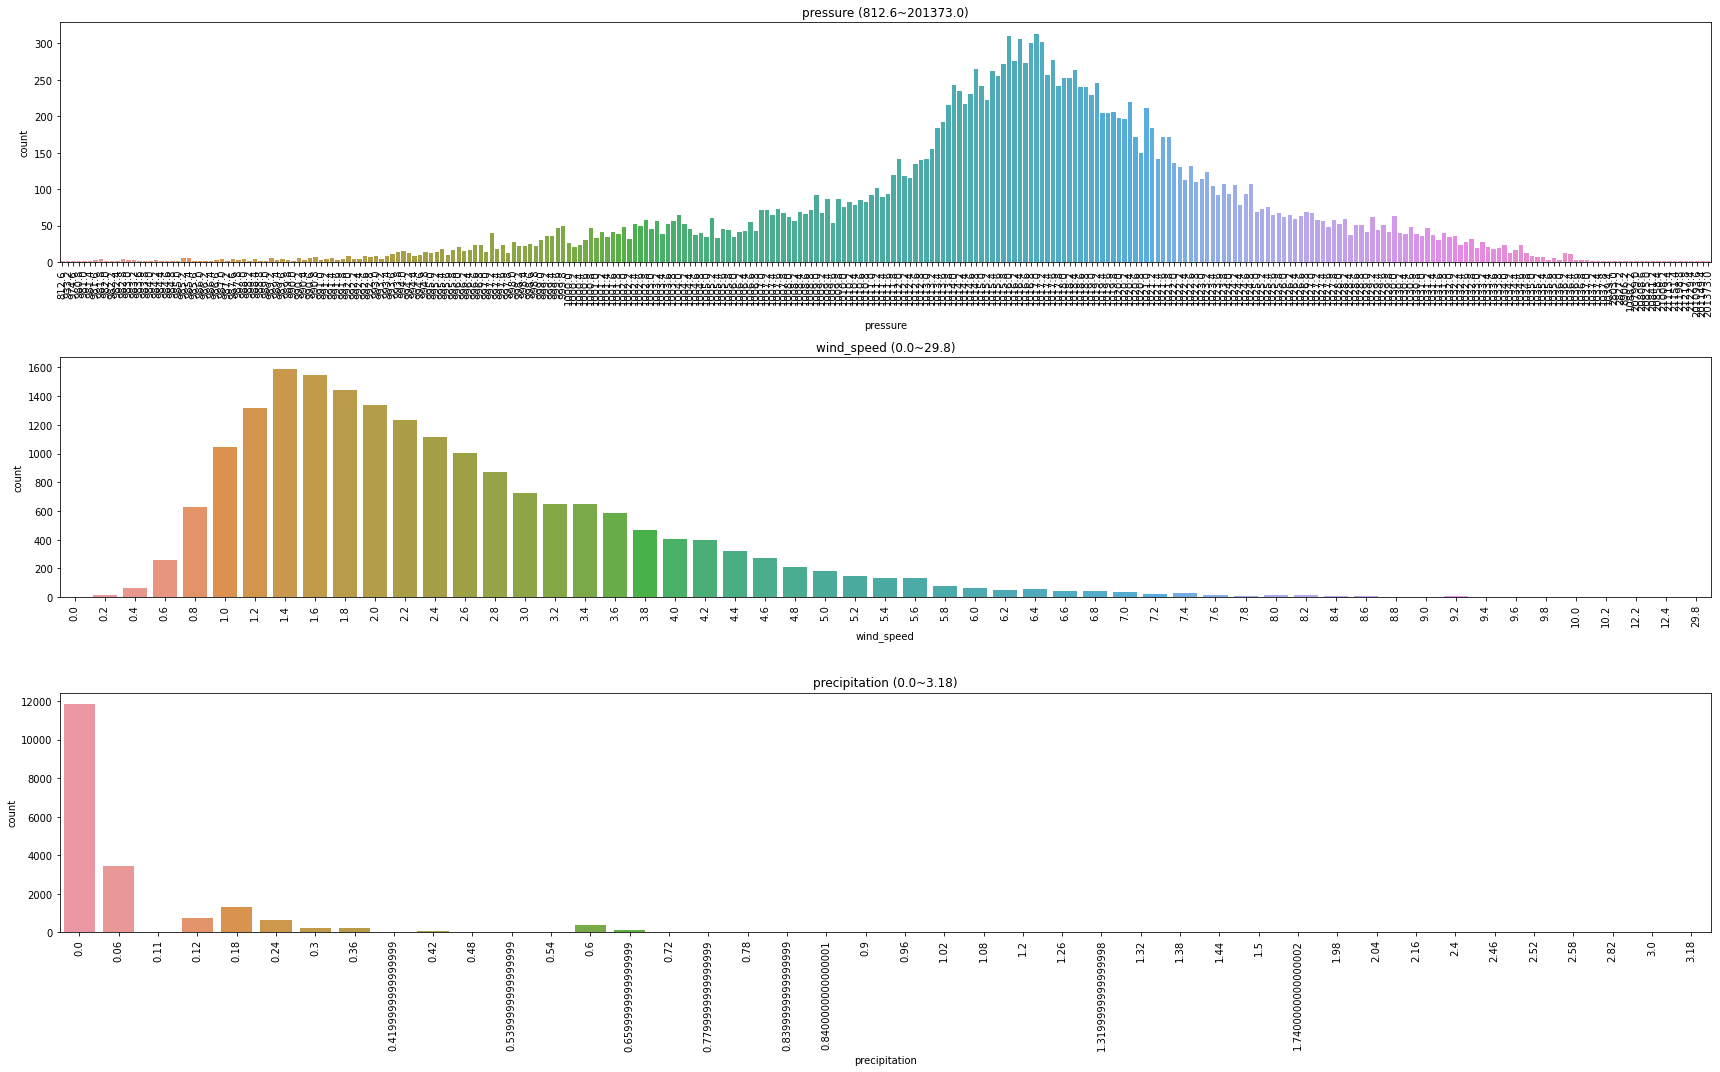

In [ ]:
cols = ['pressure', 'wind_speed', 'precipitation']
fig, axes = plt.subplots(nrows = len(cols), figsize = (24, 5*len(cols)))
for col, ax in zip(cols, axes.flat):
  plt.sca(ax)
  plt.xticks(rotation=90)
  min_val = min(train[col])
  max_val = max(train[col])
  ax.set(title = f'{col} ({min_val}~{max_val})')
  sns.countplot(data = train, x = col, ax = ax)

fig.tight_layout()

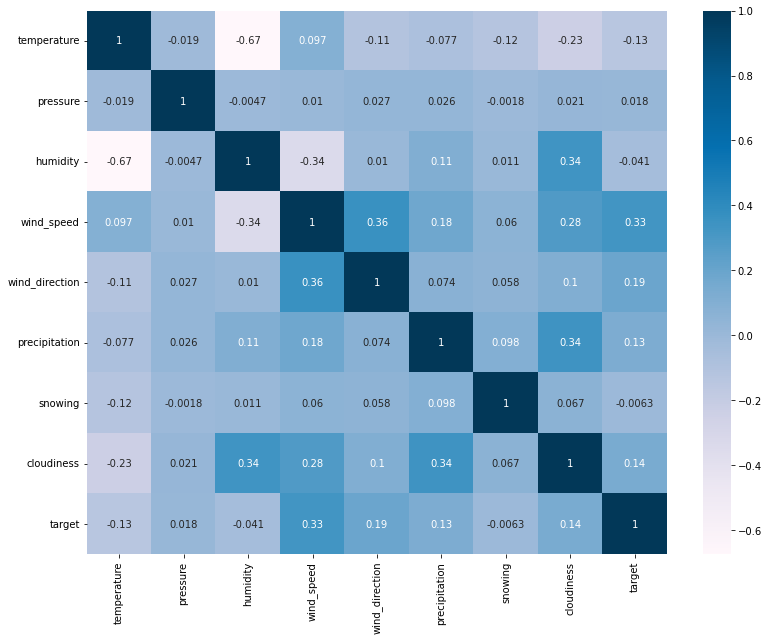

In [ ]:
plt.figure(figsize = (13, 10))
colormap = plt.cm.PuBu
sns.heatmap(train.corr(), annot = True, cmap = colormap)
plt.show()

* pressure, windspeed, precipitation에 이상치 존재 (kurtosis 높음)
* snowing 카데고리 불균형 but snowing=True와 snowing=False 그룹 사이에 target에 대한 평균의 차이는 통계적으로 유의미하지 않은듯
* pressure, snowing은 target과 상관성 매우 낮아보임

## Preprocessing

In [52]:
# 이상치 제거

print(f"Before: {train.shape}")
# train = train[(train['pressure'] <= 2000) & (train['pressure'] > 940)]
train = train[(train['wind_speed']< 20)]
# out_cols = ['pressure', 'wind_speed']
# for col in out_cols:
#   Q1 = train[col].quantile(0.25)
#   Q3 = train[col].quantile(0.75)
#   IQR = Q3 - Q1    #IQR is interquartile range. 

#   filter = (train[col] >= Q1 - 1.5 * IQR) & (train[col] <= Q3 + 1.5 *IQR)
#   train = train.loc[filter]  
print(f"After: {train.shape}")

Before: (19275, 10)
After: (19274, 10)


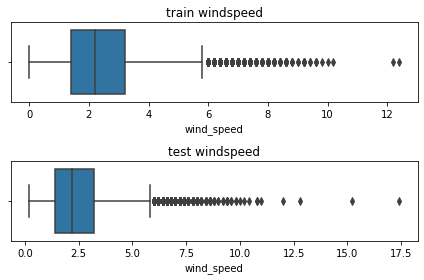

In [ ]:
fig, axes = plt.subplots(nrows=2)
sns.boxplot(data = train, x = 'wind_speed', ax=axes[0])
axes[0].set_title("train windspeed")
sns.boxplot(data = test, x = 'wind_speed', ax=axes[1])
axes[1].set_title("test windspeed")
fig.tight_layout()
plt.show()

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

traindf = train.select_dtypes(include=numerics)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    traindf.values, i) for i in range(traindf.shape[1])]
vif["numeric features"] = traindf.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif


,VIF Factor,numeric features
0,11.040698,wind_direction
1,10.985074,humidity
2,6.884022,wind_speed
3,4.679300,temperature
4,4.586985,cloudiness
5,4.406633,target
6,1.321158,precipitation
7,1.172495,pressure


In [56]:
#참고용
traindf = train.select_dtypes(include=numerics).drop(['wind_direction'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    traindf.values, i) for i in range(traindf.shape[1])]
vif["numeric features"] = traindf.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,numeric features
0,7.367865,humidity
1,5.520820,wind_speed
2,4.594173,temperature
3,4.524485,cloudiness
4,4.367626,target
5,1.320886,precipitation
6,1.171061,pressure


In [ ]:
#drop columns

#drop_columns = ['id', 'snowing', 'pressure']
drop_columns = ['id', 'snowing']

train = train.drop(drop_columns, axis = 1)
test = test.drop(drop_columns, axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
x = train.drop('target', axis=1)
scaler = StandardScaler()
#scaler = Normalizer()
X_train_scaled = scaler.fit_transform(x)
X_test_scaled = scaler.transform(test)

train.loc[:,:-1] = X_train_scaled
test.loc[:,:] = X_test_scaled

<ipython-input-40-7172a3374f1b>:8: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  train.loc[:,:-1] = X_train_scaled


In [ ]:
train

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
0,1.472800,-0.018171,-1.490805,-0.056147,1.148442,-0.396525,-1.460706,1.180
1,-1.603646,-0.013061,0.514993,0.835632,0.094538,-0.396525,-0.961477,8.581
2,0.491290,-0.017149,-0.279249,-0.204777,0.687796,-0.085822,-0.155903,3.978
3,0.387544,-0.016677,0.245759,-1.245186,0.851814,-0.396525,-1.460706,8.301
4,-1.357281,-0.014397,0.932307,-0.947926,-0.149744,-0.396525,-0.609748,1.692
...,...,...,...,...,...,...,...,...
19270,-0.732471,-0.014162,0.838075,-0.650666,0.164333,-0.396525,-1.460706,7.047
19271,-0.007836,-0.026189,0.622687,-0.353407,0.548206,-0.085822,0.036981,3.670
19272,-0.492223,-0.023595,-0.265787,2.916450,1.630028,1.467694,1.546015,3.328
19273,0.287190,-0.015891,-1.585037,-0.056147,-0.812796,-0.085822,-0.326095,12.379


## 모델 정의 및 학습

### AutoGluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(train)
test_data = TabularDataset(test)

In [ ]:
label = 'target'
eval_metric = 'mean_absolute_error'
time_limit = 3600*2 #훈련 시간 제한 2시간

In [ ]:
predictor = TabularPredictor(
    label=label,
    eval_metric=eval_metric
).fit(train_data, presets='best_quality', time_limit=time_limit)

No path specified. Models will be saved in: "AutogluonModels/ag-20230222_064902/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to "AutogluonModels/ag-20230222_064902/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    19274
Train Data Columns: 7
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (17.344, 0.0, 5.47686, 3.21758)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Usin

In [ ]:
predictor.leaderboard(silent = True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-1.846904,323.954829,5298.031912,0.001305,0.571829,3,True,22
1,NeuralNetTorch_BAG_L2,-1.851743,318.670923,4770.714336,0.432332,267.303881,2,True,20
2,NeuralNetFastAI_BAG_L2,-1.879212,318.970394,4777.573516,0.731803,274.163061,2,True,18
3,LightGBMXT_BAG_L2,-1.879432,319.392253,4539.711621,1.153663,36.301166,2,True,13
4,XGBoost_BAG_L2,-1.881775,318.601351,4542.808955,0.362761,39.398500,2,True,19
5,CatBoost_BAG_L2,-1.882430,318.325514,4586.613549,0.086923,83.203094,2,True,16
6,LightGBM_BAG_L2,-1.884335,318.650681,4539.420300,0.412091,36.009845,2,True,14
7,LightGBMLarge_BAG_L2,-1.889380,318.878164,4564.558604,0.639573,61.148149,2,True,21
8,ExtraTreesMSE_BAG_L2,-1.900225,320.384805,4525.522524,2.146214,22.112069,2,True,17
9,RandomForestMSE_BAG_L2,-1.905178,319.640841,4633.334422,1.402250,129.923967,2,True,15


In [ ]:
predictor.save()

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230222_064902/")


In [ ]:
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_data, model=model_to_use)

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = model_pred
submission

,id,target
0,TEST_00000,4.806168
1,TEST_00001,5.019351
2,TEST_00002,7.424673
3,TEST_00003,4.493515
4,TEST_00004,4.919379
...,...,...
19270,TEST_19270,3.447003
19271,TEST_19271,4.474634
19272,TEST_19272,2.807934
19273,TEST_19273,4.287964


In [ ]:
submission.to_csv('sub_autogluon.csv', index=False)

* public score: 1.84108